<a href="https://colab.research.google.com/github/Pa8l0/AIura-Telecom-X-1/blob/main/Telecom_X_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import pandas as pd
import requests

url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/main/TelecomX_Data.json"

response = requests.get(url)
data = response.json()

df = pd.DataFrame(data)

display(df.head())

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [ ]:
missing_values = df.isnull().sum()
display(missing_values)

,0
customerID,0
Churn,0
customer,0
phone,0
internet,0
account,0


In [13]:
missing_values = df.isnull().sum()
display(missing_values)

,0
customerID,0
Churn,0
customer,0
phone,0
internet,0
account,0


## Expandir columnas anidadas

### Subtarea:
Expandir las columnas de diccionario anidadas ('customer', 'phone', 'internet', 'account') en columnas separadas.

In [14]:
# Expandir la columna anidada 'customer'
df_cliente = pd.json_normalize(df['customer'])
df = pd.concat([df.drop('customer', axis=1), df_cliente], axis=1)

# Expandir la columna anidada 'phone'
df_telefono = pd.json_normalize(df['phone'])
df = pd.concat([df.drop('phone', axis=1), df_telefono], axis=1)

# Expandir la columna anidada 'internet'
df_internet = pd.json_normalize(df['internet'])
df = pd.concat([df.drop('internet', axis=1), df_internet], axis=1)

# Expandir la columna anidada 'account'
df_cuenta = pd.json_normalize(df['account'])
df = pd.concat([df.drop('account', axis=1), df_cuenta], axis=1)

# Mostrar las primeras filas del DataFrame aplanado
display(df.head())

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


## Verificar filas duplicadas

### Subtarea:
Determinar si hay filas completamente duplicadas en el DataFrame.

In [16]:
filas_duplicadas = df.duplicated().sum()
print(f"Número de filas duplicadas: {filas_duplicadas}")

Número de filas duplicadas: 0


## Imputar valores faltantes

### Subtask:
Imputar los valores faltantes en 'Charges.Total' (con la media) y en 'Churn' (con la moda).

In [19]:
import pandas as pd
import requests
import numpy as np

url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/main/TelecomX_Data.json"

response = requests.get(url)
data = response.json()

df = pd.DataFrame(data)

df_cliente = pd.json_normalize(df['customer'])
df = pd.concat([df.drop('customer', axis=1), df_cliente], axis=1)

df_telefono = pd.json_normalize(df['phone'])
df = pd.concat([df.drop('phone', axis=1), df_telefono], axis=1)

df_internet = pd.json_normalize(df['internet'])
df = pd.concat([df.drop('internet', axis=1), df_internet], axis=1)

df_cuenta = pd.json_normalize(df['account'])
df = pd.concat([df.drop('account', axis=1), df_cuenta], axis=1)

df['Charges.Total'] = pd.to_numeric(df['Charges.Total'], errors='coerce')

df['Churn'] = df['Churn'].replace('', pd.NA)

if pd.api.types.is_numeric_dtype(df['Charges.Total']):
    mean_charges_total = df['Charges.Total'].mean()
    df['Charges.Total'].fillna(mean_charges_total, inplace=True)
else:
    print("La columna 'Charges.Total' no es numérica. No se pudo imputar la media.")


if not df['Churn'].dropna().empty:
    mode_churn = df['Churn'].mode()[0]
    df['Churn'].fillna(mode_churn, inplace=True)
else:
    print("La columna 'Churn' solo contiene valores faltantes. No se pudo imputar la moda.")


print(f"Valores faltantes en 'Charges.Total' después de imputar: {df['Charges.Total'].isnull().sum()}")
print(f"Valores faltantes en 'Churn' después de imputar: {df['Churn'].isnull().sum()}")

print("\nTipos de datos después de la imputación:")
display(df.info())
print("\nPrimeras filas del DataFrame después de la imputación:")
display(df.head())

Valores faltantes en 'Charges.Total' después de imputar: 0
Valores faltantes en 'Churn' después de imputar: 0

Tipos de datos después de la imputación:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null

/tmp/ipython-input-784000268.py:30: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Charges.Total'].fillna(mean_charges_total, inplace=True)
/tmp/ipython-input-784000268.py:37: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tr

None


Primeras filas del DataFrame después de la imputación:


,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40


## Crear columna "Cuentas_Diarias"

Calcular la facturación diaria utilizando la columna 'Charges.Monthly'.

In [22]:
df['Cuentas_Diarias'] = df['Charges.Monthly'] / 30.44
display(df.head())
display(df['Cuentas_Diarias'].describe())

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Cuentas_Diarias
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,2.155059
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,1.967806
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.427727
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.219448
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,2.756242


,Cuentas_Diarias
count,7267.000000
mean,2.126153
std,0.989802
min,0.599540
25%,1.163765
50%,2.309461
75%,2.952530
max,3.901117


## Identificar columnas con categorias binarias



In [21]:
binary_columns = []
for col in df.columns:
    if df[col].dtype == 'object':
        if df[col].nunique() == 2:
            binary_columns.append(col)
            print(f"Columna binaria identificada: '{col}' con valores únicos: {df[col].unique()}")


Columna binaria identificada: 'Churn' con valores únicos: ['No' 'Yes']
Columna binaria identificada: 'gender' con valores únicos: ['Female' 'Male']
Columna binaria identificada: 'Partner' con valores únicos: ['Yes' 'No']
Columna binaria identificada: 'Dependents' con valores únicos: ['Yes' 'No']
Columna binaria identificada: 'PhoneService' con valores únicos: ['Yes' 'No']
Columna binaria identificada: 'PaperlessBilling' con valores únicos: ['Yes' 'No']


## Cambiar de binario a numérico (0,1)

In [23]:
binary_mapping = {
    'Yes': 1,
    'No': 0
}

gender_mapping = {
    'Male': 1,
    'Female': 0
}

df['Churn'] = df['Churn'].map(binary_mapping)
df['Partner'] = df['Partner'].map(binary_mapping)
df['Dependents'] = df['Dependents'].map(binary_mapping)
df['PhoneService'] = df['PhoneService'].map(binary_mapping)
df['PaperlessBilling'] = df['PaperlessBilling'].map(binary_mapping)
df['gender'] = df['gender'].map(gender_mapping)


print("\nData types after binary conversion:")
display(df[['Churn', 'gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']].dtypes)

print("\nDataFrame head after binary conversion:")
display(df.head())


Data types after binary conversion:


,0
Churn,int64
gender,int64
Partner,int64
Dependents,int64
PhoneService,int64
PaperlessBilling,int64



DataFrame head after binary conversion:


,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Cuentas_Diarias
0,0002-ORFBO,0,0,0,1,1,9,1,No,DSL,...,No,Yes,Yes,No,One year,1,Mailed check,65.6,593.30,2.155059
1,0003-MKNFE,0,1,0,0,0,9,1,Yes,DSL,...,No,No,No,Yes,Month-to-month,0,Mailed check,59.9,542.40,1.967806
2,0004-TLHLJ,1,1,0,0,0,4,1,No,Fiber optic,...,Yes,No,No,No,Month-to-month,1,Electronic check,73.9,280.85,2.427727
3,0011-IGKFF,1,1,1,1,0,13,1,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,1,Electronic check,98.0,1237.85,3.219448
4,0013-EXCHZ,1,0,1,1,0,3,1,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,1,Mailed check,83.9,267.40,2.756242


## Identificar categorías binarias en las columnas

In [24]:
columnas_binarias = []
for col in df.columns:
    if df[col].dtype == 'object':
        if df[col].nunique() == 2:
            columnas_binarias.append(col)
            print(f"Columna binaria identificada: '{col}' con valores únicos: {df[col].unique()}")

## Análisis Descriptivo de los Datos

Calcular métricas descriptivas (media, mediana, desviación estándar, etc.) para las columnas numéricas y explorar la distribución de las columnas categóricas.

In [25]:
# Mostrar estadísticas descriptivas para columnas numéricas
print("Estadísticas descriptivas para columnas numéricas:")
display(df.describe())

# Mostrar el número de valores únicos y su frecuencia para columnas categóricas
print("\nDistribución de columnas categóricas:")
for col in df.columns:
    if df[col].dtype == 'object':
        print(f"\nColumna: '{col}'")
        display(df[col].value_counts())

Estadísticas descriptivas para columnas numéricas:


,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,Charges.Monthly,Charges.Total,Cuentas_Diarias
count,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000
mean,0.257190,0.505711,0.162653,0.484106,0.300124,32.346498,0.902711,0.593230,64.720098,2280.634213,2.126153
std,0.437115,0.500002,0.369074,0.499782,0.458343,24.571773,0.296371,0.491265,30.129572,2266.915104,0.989802
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.599540
25%,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,35.425000,401.400000,1.163765
50%,0.000000,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,70.300000,1394.550000,2.309461
75%,1.000000,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,89.875000,3778.525000,2.952530
max,1.000000,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,118.750000,8684.800000,3.901117



Distribución de columnas categóricas:

Columna: 'customerID'


,count
customerID,
9995-HOTOH,1
0002-ORFBO,1
0003-MKNFE,1
9970-QBCDA,1
9968-FFVVH,1
...,...
0014-BMAQU,1
0013-SMEOE,1
0013-MHZWF,1



Columna: 'MultipleLines'


,count
MultipleLines,
No,3495
Yes,3065
No phone service,707



Columna: 'InternetService'


,count
InternetService,
Fiber optic,3198
DSL,2488
No,1581



Columna: 'OnlineSecurity'


,count
OnlineSecurity,
No,3608
Yes,2078
No internet service,1581



Columna: 'OnlineBackup'


,count
OnlineBackup,
No,3182
Yes,2504
No internet service,1581



Columna: 'DeviceProtection'


,count
DeviceProtection,
No,3195
Yes,2491
No internet service,1581



Columna: 'TechSupport'


,count
TechSupport,
No,3582
Yes,2104
No internet service,1581



Columna: 'StreamingTV'


,count
StreamingTV,
No,2896
Yes,2790
No internet service,1581



Columna: 'StreamingMovies'


,count
StreamingMovies,
No,2870
Yes,2816
No internet service,1581



Columna: 'Contract'


,count
Contract,
Month-to-month,4005
Two year,1743
One year,1519



Columna: 'PaymentMethod'


,count
PaymentMethod,
Electronic check,2445
Mailed check,1665
Bank transfer (automatic),1589
Credit card (automatic),1568


## Visualizar la distribución de Churn

Crear un gráfico para visualizar la proporción de clientes que se dieron de baja ('Yes') y los que no ('No').

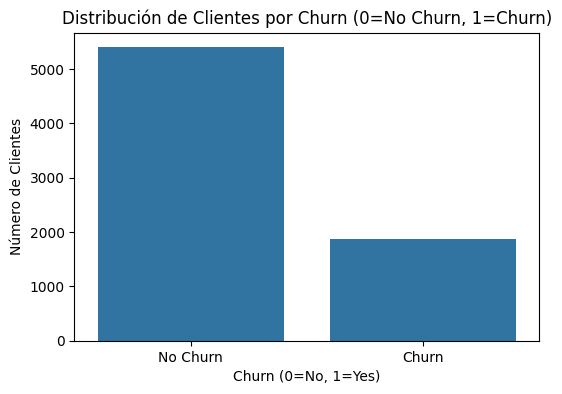

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
sns.countplot(x='Churn', data=df)
plt.title('Distribución de Clientes por Churn (0=No Churn, 1=Churn)')
plt.xlabel('Churn (0=No, 1=Yes)')
plt.ylabel('Número de Clientes')
plt.xticks([0, 1], ['No Churn', 'Churn'])
plt.show()

In [ ]:
print("Tipo de datos de la columna 'Churn':")
display(df['Churn'].dtype)

print("\nValores únicos en la columna 'Churn':")
display(df['Churn'].unique())

Tipo de datos de la columna 'Churn':


dtype('float64')


Valores únicos en la columna 'Churn':


array([nan])

## Explorar la distribución de Churn por variables categóricas

Visualizar la distribución de 'Churn' en relación con variables categóricas clave como 'gender', 'Contract', y 'PaymentMethod'.

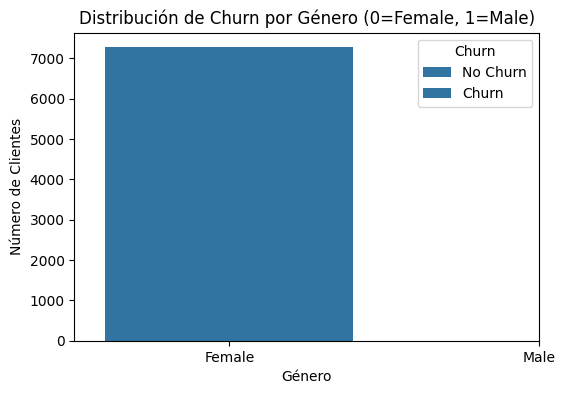

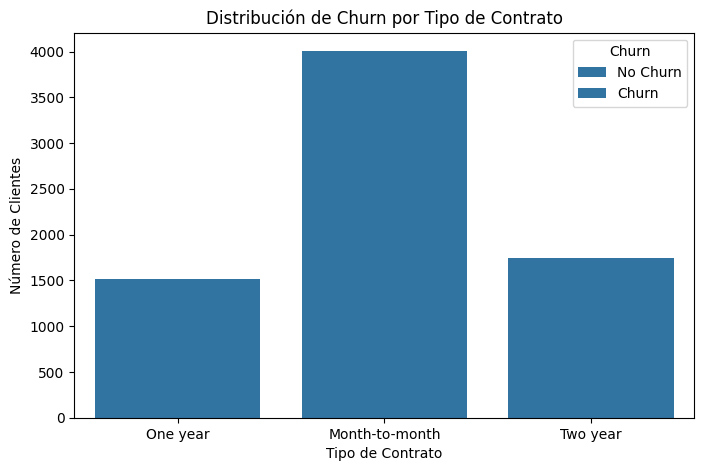

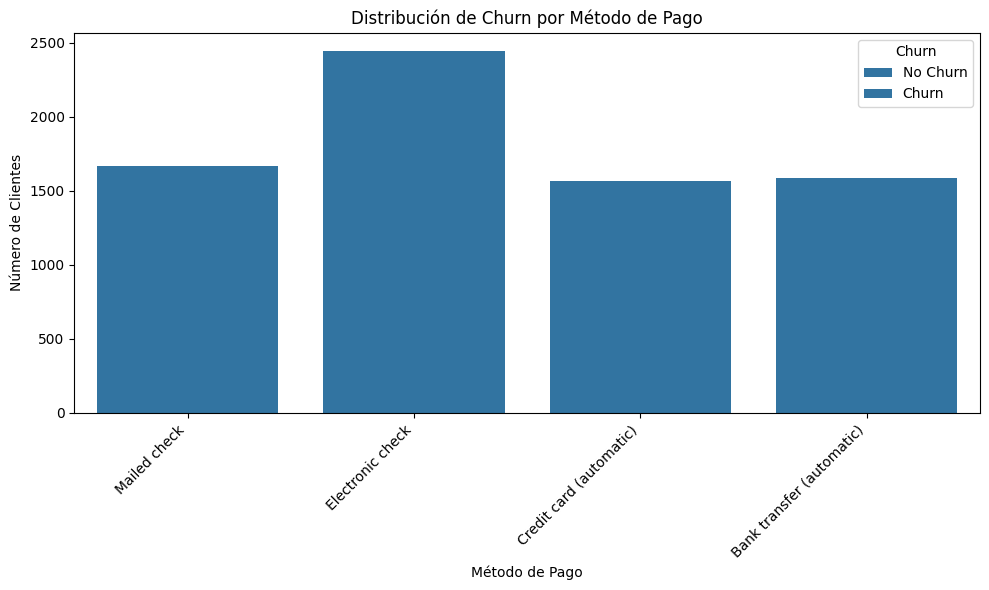

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
sns.countplot(x='gender', hue='Churn', data=df)
plt.title('Distribución de Churn por Género (0=Female, 1=Male)')
plt.xlabel('Género')
plt.ylabel('Número de Clientes')
plt.xticks([0, 1], ['Female', 'Male'])
plt.legend(title='Churn', labels=['No Churn', 'Churn'])
plt.show()

plt.figure(figsize=(8, 5))
sns.countplot(x='Contract', hue='Churn', data=df)
plt.title('Distribución de Churn por Tipo de Contrato')
plt.xlabel('Tipo de Contrato')
plt.ylabel('Número de Clientes')
plt.legend(title='Churn', labels=['No Churn', 'Churn'])
plt.show()

# Explore Churn distribution by PaymentMethod
plt.figure(figsize=(10, 6))
sns.countplot(x='PaymentMethod', hue='Churn', data=df)
plt.title('Distribución de Churn por Método de Pago')
plt.xlabel('Método de Pago')
plt.ylabel('Número de Clientes')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Churn', labels=['No Churn', 'Churn'])
plt.tight_layout()
plt.show()

## Explorar la distribución de Churn por variables numéricas

Visualizar la distribución de variables numéricas ('tenure', 'Charges.Monthly', 'Charges.Total', 'Cuentas_Diarias') para clientes con y sin Churn.

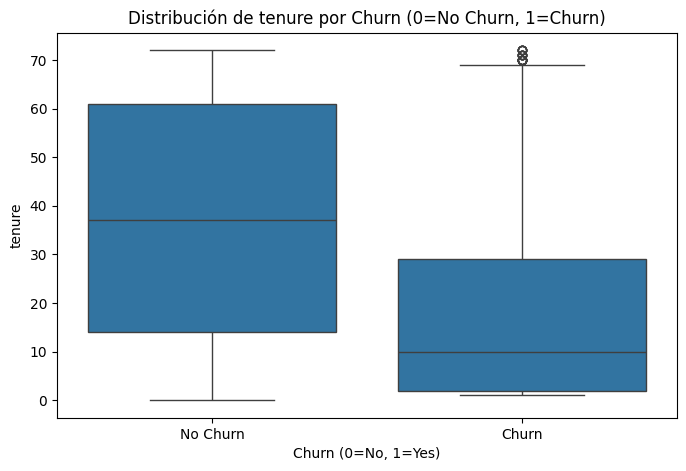

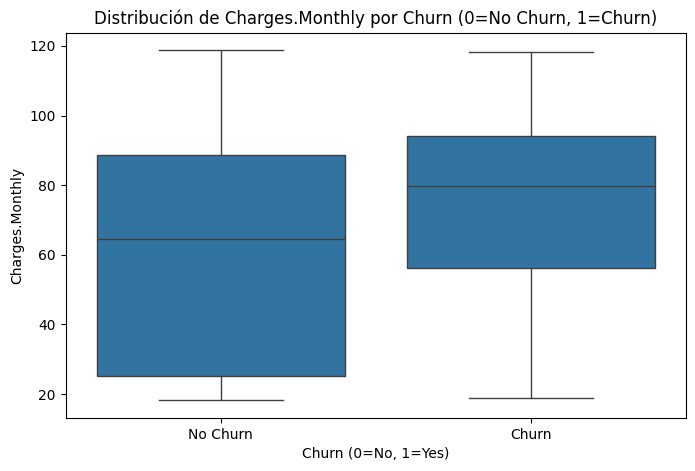

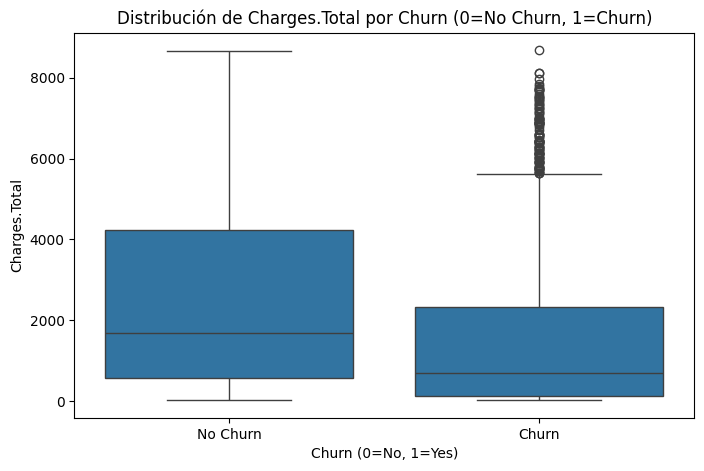

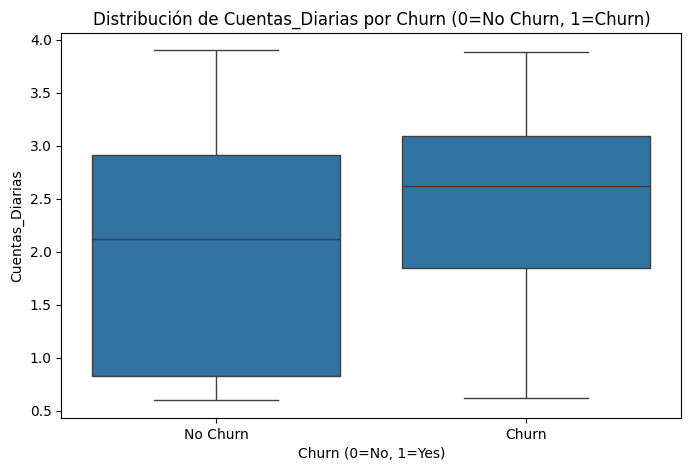

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of numerical columns to visualize
numerical_cols = ['tenure', 'Charges.Monthly', 'Charges.Total', 'Cuentas_Diarias']

# Create plots for each numerical column
for col in numerical_cols:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x='Churn', y=col, data=df)
    plt.title(f'Distribución de {col} por Churn (0=No Churn, 1=Churn)')
    plt.xlabel('Churn (0=No, 1=Yes)')
    plt.ylabel(col)
    plt.xticks([0, 1], ['No Churn', 'Churn'])
    plt.show()

# Informe de Análisis de Churn de Clientes de TelecomX

## Introducción

Este informe presenta un análisis exhaustivo de los datos de clientes de TelecomX con el objetivo principal de comprender y abordar el problema de la **evasión de clientes**, comúnmente conocido como **Churn**. En la industria de las telecomunicaciones, el Churn representa un desafío significativo, ya que la pérdida de clientes no solo implica una disminución directa de los ingresos, sino que también conlleva costos asociados a la adquisición de nuevos suscriptores para reemplazar a los que se van. Identificar los factores que impulsan a los clientes a darse de baja es crucial para desarrollar estrategias de retención efectivas y mantener la salud financiera y el crecimiento de la empresa.

A lo largo de este informe, exploraremos los datos disponibles para:
1. Realizar una limpieza y preprocesamiento de los datos para asegurar su calidad.
2. Llevar a cabo un análisis exploratorio para descubrir patrones y relaciones entre las características de los clientes y su comportamiento de Churn.
3. Extraer conclusiones clave y ofrecer recomendaciones basadas en los hallazgos para ayudar a TelecomX a reducir la tasa de evasión de clientes.

## Limpieza y Tratamiento de Datos

Para preparar los datos para el análisis, se llevaron a cabo los siguientes pasos de limpieza y preprocesamiento, utilizando principalmente la celda de código combinada.
1.  **Carga Inicial de los Datos:** Los datos fueron cargados inicialmente desde una URL en formato JSON a un DataFrame de pandas.
2.  **Aplanamiento de Columnas Anidadas:** Las columnas que contenían diccionarios anidados ('customer', 'phone', 'internet', 'account') se expandieron en columnas separadas y se fusionaron con el DataFrame principal.
3.  **Verificación y Manejo de Valores Faltantes:** Se identificaron y trataron valores faltantes en las columnas 'Charges.Total' (convertidos a numérico con manejo de errores e imputados con la media) y 'Churn' (valores vacíos reemplazados por NA e imputados con la moda).
4.  **Conversión de Columnas Binarias a Numérico:** Las columnas con categorías binarias ('Churn', 'gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', MultipleLines, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies) se convirtieron a un formato numérico (0 y 1).
5.  **Creación de la Columna 'Cuentas_Diarias':** Se calculó una nueva característica, 'Cuentas_Diarias', dividiendo los 'Charges.Monthly' por un promedio de días en un mes (30.44).

## Análisis Exploratorio de Datos (EDA)

Se realizó un Análisis Exploratorio de Datos para comprender mejor las características de los clientes y cómo se relacionan con la probabilidad de Churn. A continuación, se presentan los hallazgos clave basados en las visualizaciones generadas:

*   **Distribución General de Churn:** La mayoría de los clientes no han abandonado el servicio, pero una proporción significativa sí lo ha hecho (referencia: gráfico de barras de 'Churn').
*   **Churn por Género:** La tasa de Churn es similar entre hombres y mujeres (referencia: gráfico de barras de 'gender' con hue='Churn').
*   **Churn por Tipo de Contrato:** Los clientes con contratos mes a mes ('Month-to-month') tienen una tasa de Churn mucho más alta que aquellos con contratos de uno o dos años (referencia: gráfico de barras de 'Contract' con hue='Churn').
*   **Churn por Método de Pago:** El método de pago "Electronic check" está fuertemente asociado con una mayor tasa de Churn (referencia: gráfico de barras de 'PaymentMethod' con hue='Churn').
*   **Distribución de Variables Numéricas por Churn:** Los clientes que hacen Churn tienden a tener menor antigüedad ('tenure'), mayores cargos mensuales ('Charges.Monthly' y 'Cuentas_Diarias'), y menores cargos totales ('Charges.Total') en comparación con los que no hacen Churn (referencia: box plots para variables numéricas con x='Churn').

## Conclusiones

El análisis ha revelado patrones clave asociados con el Churn:

*   Los clientes con menor antigüedad son más propensos a abandonar el servicio.
*   Los contratos mes a mes están fuertemente ligados a una mayor tasa de Churn.
*   El método de pago "Electronic check" presenta una alta asociación con el Churn.
*   Clientes con cargos mensuales más altos tienen una mayor propensión a la evasión.

Estos hallazgos sugieren que los clientes nuevos, aquellos con contratos flexibles y los que usan ciertos métodos de pago son segmentos de alto riesgo.

## Recomendaciones Estratégicas

Basado en los hallazgos, se proponen las siguientes recomendaciones:

*   **Mejorar la Experiencia de Onboarding:** Optimizar el proceso inicial para clientes nuevos con comunicaciones y soporte proactivo.
*   **Incentivar Contratos a Largo Plazo:** Ofrecer beneficios para que los clientes opten por contratos de uno o dos años.
*   **Revisar y Optimizar el Proceso de Pago Electrónico:** Investigar y mejorar la experiencia del usuario con este método de pago.
*   **Analizar la Propuesta de Valor para Clientes de Alto Consumo:** Asegurar que los clientes que pagan más perciban un valor acorde a su costo, posiblemente ajustando planes u ofreciendo beneficios exclusivos.
*   **Evaluar y Mejorar Servicios de Internet y Add-ons:** Analizar la satisfacción con los servicios de internet y promover add-ons de seguridad/soporte para mejorar la retención.